<a href="https://colab.research.google.com/github/sanket7293/my_projects/blob/main/K-means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('/content/customer (1).csv')
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [66]:
df.shape

(850, 10)

In [49]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [67]:
df.duplicated().sum()

0

In [68]:
df.isnull().sum()

,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
Address,0
DebtIncomeRatio,0


In [53]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


# ***Obeservation***



1.   there are 850 row and 10 columns in the datasets.
2.   columns names = ['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio']
3.   all datatypes is perfect
4.   No duplicates values in dataset
5.   there are missing value in this columns Defaulted




**I replace missing value median**

In [69]:
df['Defaulted'].fillna(df['Defaulted'].median(),inplace=True)


<ipython-input-69-c49e45c668a7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Defaulted'].fillna(df['Defaulted'].median(),inplace=True)


In [70]:
df.isnull().sum()

,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,0
Address,0
DebtIncomeRatio,0


**CUST_ID columns no effect no modeling so i remove the columns in datasets**

In [71]:
df.drop(columns=['Address'],inplace=True)

In [72]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**heatmap**

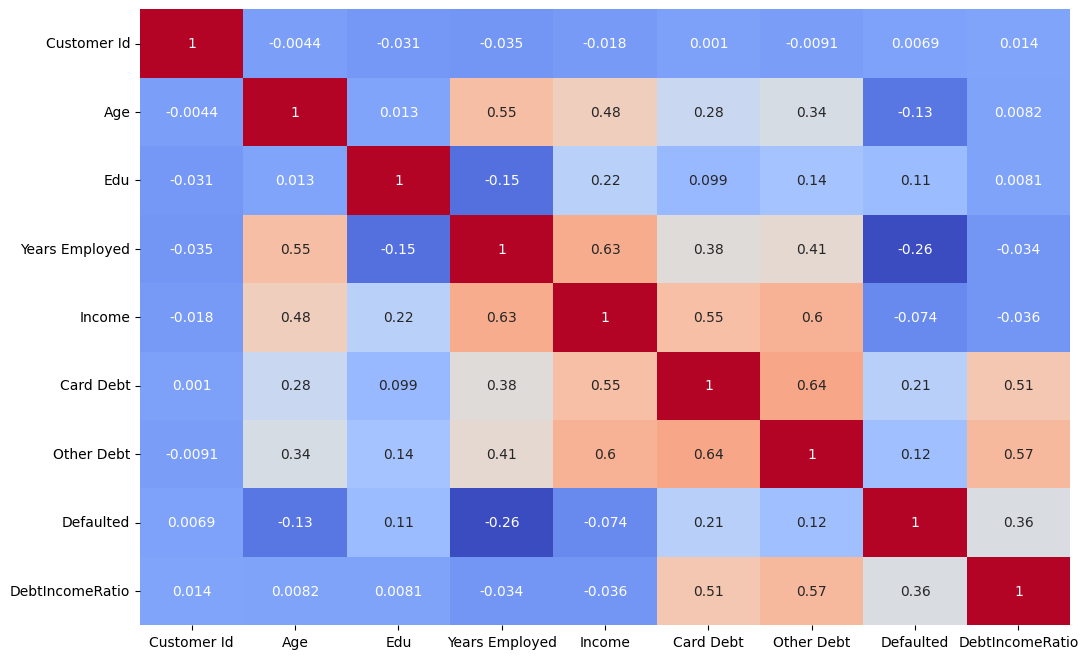

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap (df.corr(), annot = True, cmap = 'coolwarm', cbar = False)
plt.show ()

**count plot**

<Axes: xlabel='Edu', ylabel='count'>

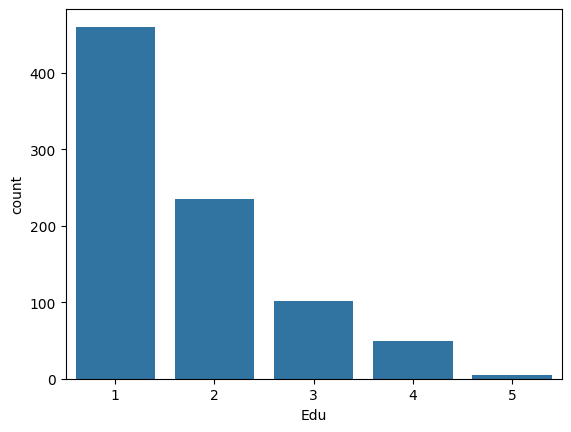

In [104]:
sns.countplot(x='Edu',data=df)

**scatter**

Text(0, 0.5, 'Years Employed')

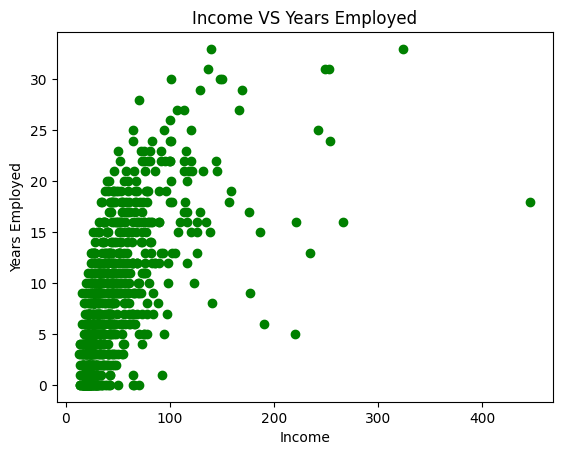

In [74]:
plt.scatter(df['Income'],df['Years Employed'],c='green')
plt.title("Income VS Years Employed")
plt.xlabel('Income')
plt.ylabel('Years Employed')

Text(0.5, 0, 'Income')

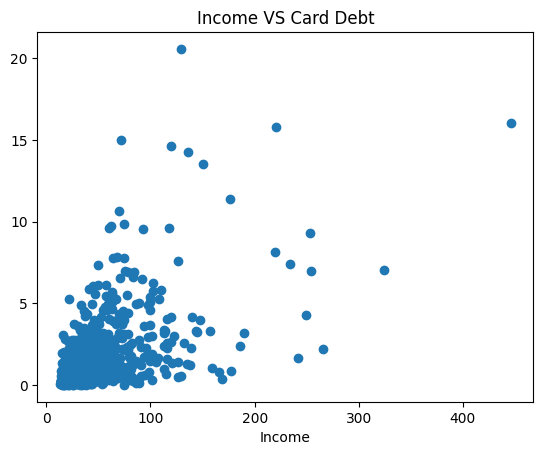

In [97]:
plt.scatter(df['Income'],df['Card Debt'])
plt.title("Income VS Card Debt")
plt.xlabel('Income')

Text(0.5, 0, 'Income')

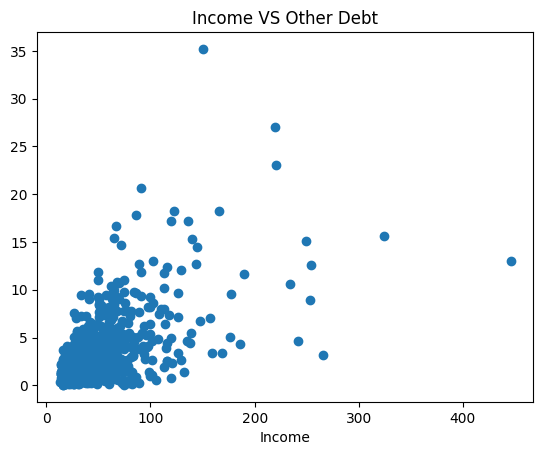

In [98]:
plt.scatter(df['Income'],df['Other Debt'])
plt.title("Income VS Other Debt")
plt.xlabel('Income')

In [75]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [76]:
scaled_feature=scaler.fit_transform(df)

In [77]:
from sklearn.cluster import KMeans

In [78]:
wcss=[]
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(scaled_feature)
  wcss.append(km.inertia_)

In [79]:
wcss

[7650.000000000004,
 6042.845315281517,
 5189.084314718189,
 4612.922383018126,
 4309.2789705011255,
 3961.3621186204937,
 3727.427345133083,
 3629.2670014811233,
 3272.6100927539583,
 3146.565534814393]

**Elbow grap**

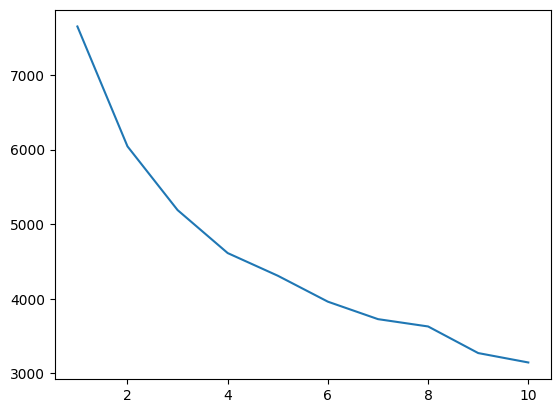

In [80]:
plt.plot(range(1,11),wcss)

In [92]:
x = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means=km.fit_predict(x)

In [93]:
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

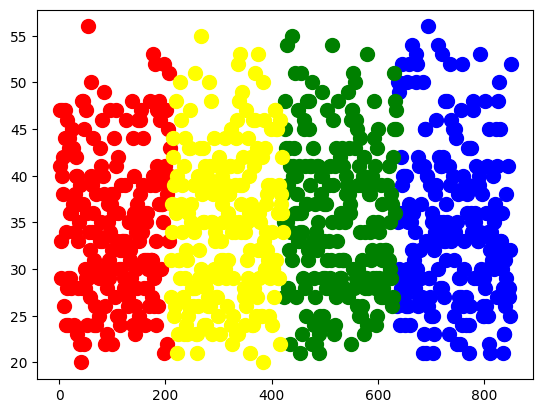

In [95]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='yellow',label='cluster4')